# use conditional edge to control the flow

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END 

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalnumber: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['finalnumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['finalnumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""
    if state['operation'] == '+':
        return "addition"
    elif state['operation'] == '-':
        return "subtraction"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) #passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges("router", 
    decide_next_node, 
    {
        #"edge": "node"
        "addition": "add_node",
        "subtraction": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

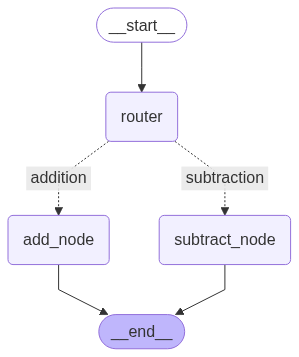

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
inital_state_1 = AgentState(number1= 10, operation= "+", number2 = 4)
print(app.invoke(inital_state_1))

{'number1': 10, 'operation': '+', 'number2': 4, 'finalnumber': 14}
